# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [4]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [5]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [9]:
X_train.shape

(55000, 28, 28)

In [10]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

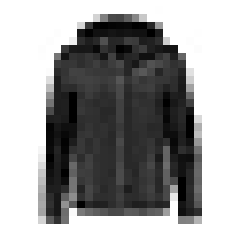

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

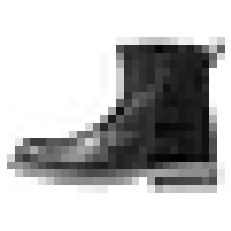

In [11]:
plt.imshow(X_train[3], cmap="binary")
plt.axis('off')
plt.show()

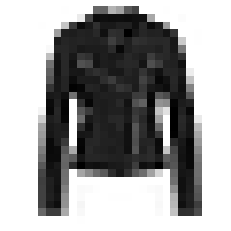

In [12]:
plt.imshow(X_train[9], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [15]:
class_names[y_train[0]]

'Coat'

In [16]:
class_names[y_train[3]]

'Ankle boot'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [17]:
X_valid.shape

(5000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

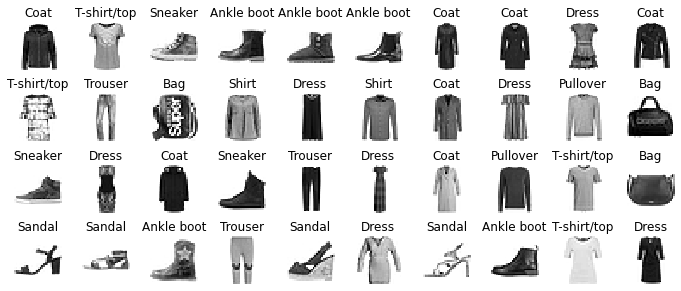

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [24]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.layers

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


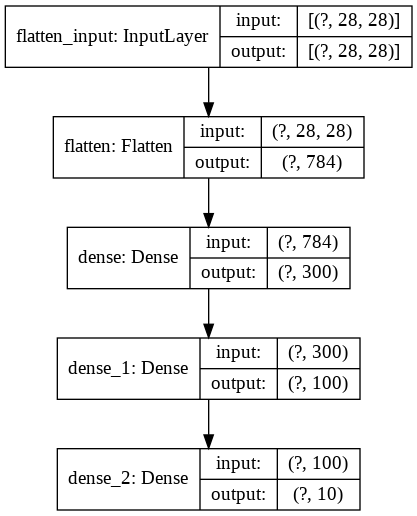

In [27]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [28]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [29]:
hidden0 = model.layers[0]
hidden0.name

'flatten'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[-0.02579143, -0.02607693,  0.03013101, ..., -0.03498784,
         0.03756991,  0.03728417],
       [-0.02371168, -0.00984675,  0.05386323, ...,  0.05078243,
        -0.04730336,  0.02780786],
       [-0.06755311, -0.0645785 ,  0.03675468, ..., -0.05215848,
        -0.05664575,  0.02238189],
       ...,
       [ 0.05764285, -0.04284463, -0.04632498, ...,  0.04677754,
         0.03847817, -0.05916373],
       [-0.01780958,  0.02644382,  0.00049515, ..., -0.04858703,
        -0.03182134,  0.04628294],
       [-0.07413887, -0.02229052,  0.01250377, ...,  0.01042654,
        -0.01371431, -0.05936766]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [38]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7272 - accuracy: 0.7613 - val_loss: 0.5370 - val_accuracy: 0.8138
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4931 - accuracy: 0.8280 - val_loss: 0.4783 - val_accuracy: 0.8344
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4471 - accuracy: 0.8437 - val_loss: 0.4218 - val_accuracy: 0.8612
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4182 - accuracy: 0.8538 - val_loss: 0.4066 - val_accuracy: 0.8572
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3989 - accuracy: 0.8603 - val_loss: 0.4092 - val_accuracy: 0.8558
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3816 - accuracy: 0.8654 - val_loss: 0.3750 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3680 - accuracy: 0.8708 - val_loss: 0.3830 - val_accuracy:

In [39]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

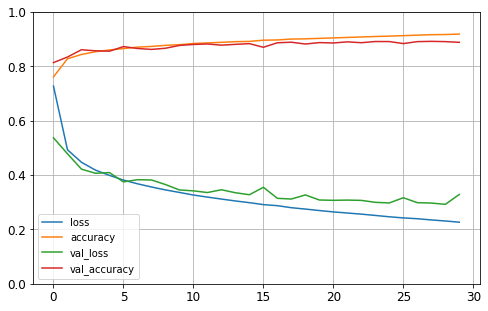

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8776


[0.35472506284713745, 0.8776000142097473]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

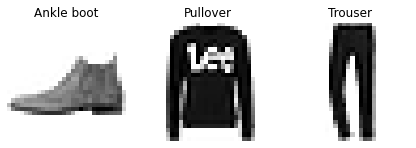

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

https://keras.io/api/optimizers/

https://keras.io/

1) Plot Learning curves when using different **optimizers** 'RMSprop' and 'Adam'


In [77]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [78]:
history= model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1688 - accuracy: 0.9349 - val_loss: 0.3627 - val_accuracy: 0.8968
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1645 - accuracy: 0.9377 - val_loss: 0.3807 - val_accuracy: 0.8906
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1607 - accuracy: 0.9378 - val_loss: 0.3787 - val_accuracy: 0.8876
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1594 - accuracy: 0.9392 - val_loss: 0.4066 - val_accuracy: 0.8838
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1582 - accuracy: 0.9387 - val_loss: 0.3960 - val_accuracy: 0.8870
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1507 - accuracy: 0.9418 - val_loss: 0.3992 - val_accuracy: 0.8900
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1529 - accuracy: 0.9418 - val_loss: 0.4060 - val_accuracy:

In [79]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [80]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

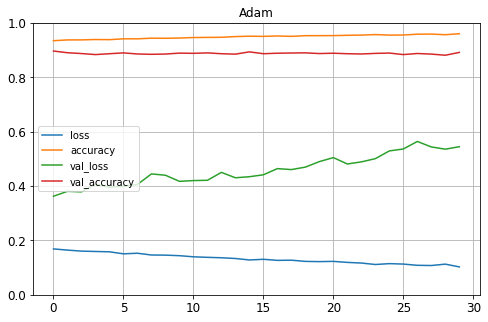

In [82]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), title=('Adam'))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [83]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5927 - accuracy: 0.8809


[0.5927486419677734, 0.8809000253677368]

In [90]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [91]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 1.4205 - accuracy: 0.4074 - val_loss: 0.9499 - val_accuracy: 0.6682
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.8062 - accuracy: 0.7122 - val_loss: 0.7218 - val_accuracy: 0.7456
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6692 - accuracy: 0.7656 - val_loss: 0.6608 - val_accuracy: 0.7720
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6127 - accuracy: 0.7823 - val_loss: 0.6075 - val_accuracy: 0.7912
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5777 - accuracy: 0.7935 - val_loss: 0.5721 - val_accuracy: 0.8142
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5551 - accuracy: 0.8005 - val_loss: 0.5686 - val_accuracy: 0.8100
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5390 - accuracy: 0.8052 - val_loss: 0.5719 - val_accuracy:

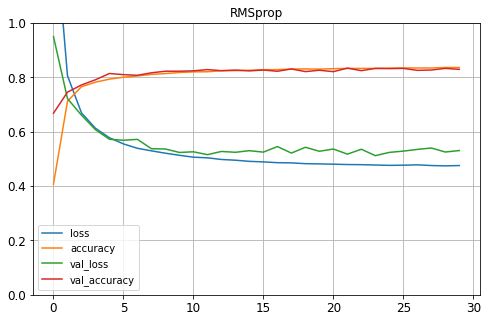

In [94]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), title=('RMSprop'))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [95]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.8148


[0.5431917309761047, 0.8148000240325928]

2) **Plot Learning curves when using different batch size**

In [97]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="SGD",
              metrics=["accuracy"])

In [98]:
history = model.fit(X_train, y_train, batch_size=4, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.5401 - accuracy: 0.8103 - val_loss: 0.5321 - val_accuracy: 0.8308
Epoch 2/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.5211 - accuracy: 0.8168 - val_loss: 0.5383 - val_accuracy: 0.8266
Epoch 3/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.5088 - accuracy: 0.8205 - val_loss: 0.5511 - val_accuracy: 0.8146
Epoch 4/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.5039 - accuracy: 0.8212 - val_loss: 0.5264 - val_accuracy: 0.8116
Epoch 5/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.4930 - accuracy: 0.8243 - val_loss: 0.5210 - val_accuracy: 0.8196
Epoch 6/30
13750/13750 [==============================] - 24s 2ms/step - loss: 0.4894 - accuracy: 0.8257 - val_loss: 0.5237 - val_accuracy: 0.8194
Epoch 7/30
13750/13750 [==============================] - 26s 2ms/step - loss: 0.4888 - accuracy: 0.8254 - val_loss: 0

In [99]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.8103


[0.5367795825004578, 0.8102999925613403]

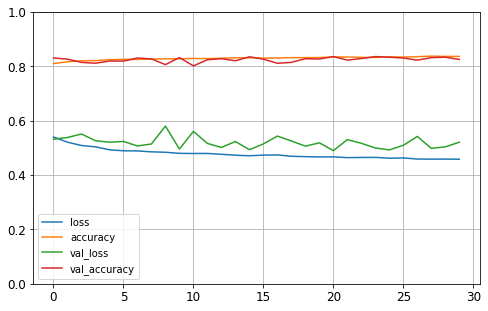

In [101]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3) Plot Learning curves when using different number of **epochs**

In [105]:
history1= model.fit(X_train, y_train, batch_size=32, epochs=6,
                    validation_data=(X_valid, y_valid))

Epoch 1/6
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4203 - accuracy: 0.8497 - val_loss: 0.4884 - val_accuracy: 0.8374
Epoch 2/6
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4200 - accuracy: 0.8498 - val_loss: 0.4872 - val_accuracy: 0.8386
Epoch 3/6
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4194 - accuracy: 0.8494 - val_loss: 0.4882 - val_accuracy: 0.8382
Epoch 4/6
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4191 - accuracy: 0.8501 - val_loss: 0.4862 - val_accuracy: 0.8360
Epoch 5/6
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4194 - accuracy: 0.8486 - val_loss: 0.4895 - val_accuracy: 0.8364
Epoch 6/6
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4190 - accuracy: 0.8493 - val_loss: 0.4946 - val_accuracy: 0.8362


In [106]:
epochs6 =model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5099 - accuracy: 0.8257


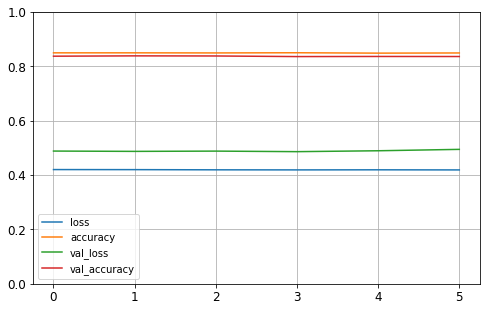

In [108]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**4) Add additional neurons and use Dropout Layer. Plot Learning curves.**

In [109]:
from keras.layers import Dropout

In [110]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.1)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [111]:
model.layers

In [112]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [113]:
hidden1 = model.layers[3]
hidden1.name

'dense_4'

In [114]:
weights, biases = hidden1.get_weights()

In [115]:
weights

array([[-0.03082101, -0.02269322,  0.08911093, ...,  0.03810149,
        -0.05755454, -0.10734405],
       [-0.0797624 ,  0.08614623,  0.00297145, ..., -0.01464582,
        -0.00871284, -0.10593427],
       [-0.11369836,  0.10165171,  0.07550151, ...,  0.01275932,
         0.0881192 ,  0.08594295],
       ...,
       [ 0.03468842,  0.05353511,  0.07433157, ...,  0.10151464,
        -0.0477954 ,  0.04444558],
       [-0.01828641, -0.0886441 ,  0.0938135 , ..., -0.09728456,
         0.00788685,  0.09753562],
       [ 0.03693355, -0.04561049, -0.08978858, ..., -0.02788843,
        -0.04227289, -0.03195012]], dtype=float32)

In [116]:
weights.shape

(300, 100)

In [117]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [118]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [119]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))



Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7306 - accuracy: 0.7577 - val_loss: 0.5108 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5058 - accuracy: 0.8242 - val_loss: 0.4426 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4539 - accuracy: 0.8408 - val_loss: 0.4135 - val_accuracy: 0.8606
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4219 - accuracy: 0.8512 - val_loss: 0.4007 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3987 - accuracy: 0.8588 - val_loss: 0.3820 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3820 - accuracy: 0.8639 - val_loss: 0.3825 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8684 - val_loss: 0.3525 - val_accuracy:

In [120]:
eval1 = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3220 - accuracy: 0.8835


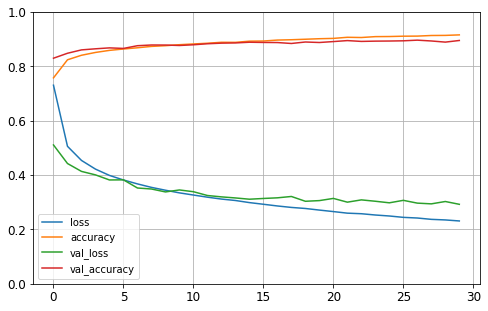

In [121]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**5) Use Batch Normalisation**

In [122]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.1)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [123]:
model.layers

In [124]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [125]:
history3 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5841 - accuracy: 0.7981 - val_loss: 0.4292 - val_accuracy: 0.8490
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4320 - accuracy: 0.8470 - val_loss: 0.3688 - val_accuracy: 0.8696
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3923 - accuracy: 0.8594 - val_loss: 0.3570 - val_accuracy: 0.8732
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3650 - accuracy: 0.8686 - val_loss: 0.3457 - val_accuracy: 0.8740
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3465 - accuracy: 0.8752 - val_loss: 0.3521 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3300 - accuracy: 0.8795 - val_loss: 0.3457 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3152 - accuracy: 0.8842 - val_loss: 0.3244 - val_accuracy:

In [126]:
zval2 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8902


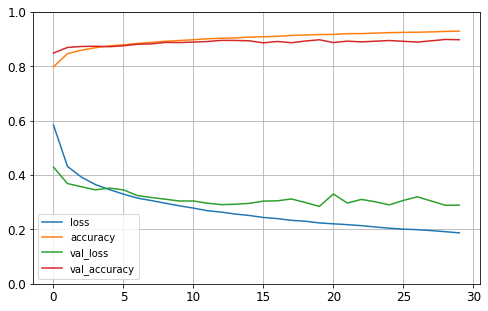

In [127]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**6) repeat with more layers**

In [129]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(180, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [130]:
model.layers

In [131]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [132]:
history4 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7618 - accuracy: 0.7351 - val_loss: 0.4415 - val_accuracy: 0.8452
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5250 - accuracy: 0.8161 - val_loss: 0.3942 - val_accuracy: 0.8576
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4765 - accuracy: 0.8286 - val_loss: 0.3631 - val_accuracy: 0.8660
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4431 - accuracy: 0.8409 - val_loss: 0.3510 - val_accuracy: 0.8744
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4179 - accuracy: 0.8497 - val_loss: 0.3417 - val_accuracy: 0.8754
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4032 - accuracy: 0.8557 - val_loss: 0.3284 - val_accuracy: 0.8810
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3940 - accuracy: 0.8581 - val_loss: 0.3372 - val_accuracy:

In [133]:
eval3 = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3208 - accuracy: 0.8836


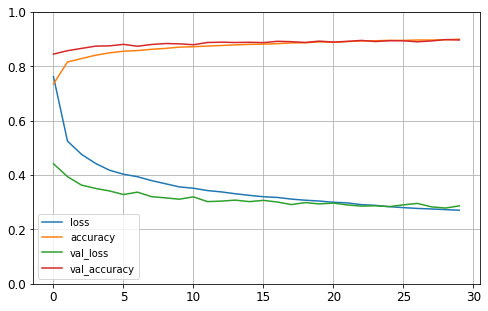

In [134]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [139]:
minist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = minist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [140]:
X_train_full.shape

(60000, 28, 28)

In [141]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [142]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [143]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [144]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [145]:
class_names = ["0", "1", "2", "3", "4","5", "6", "7", "8", "9"]

In [147]:
class_names[y_train[4]]

'1'

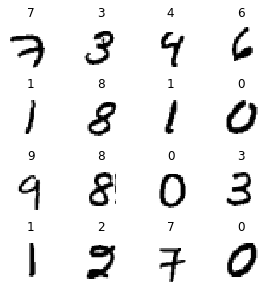

In [150]:
n_rows = 4
n_cols = 4
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

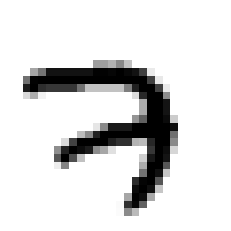

In [151]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

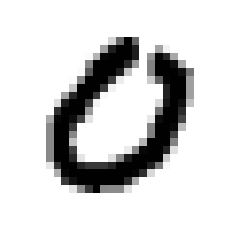

In [152]:
plt.imshow(X_train[7], cmap="binary")
plt.axis('off')
plt.show()

In [153]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(180, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.Dense(90, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

In [154]:
model.layers

In [155]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_6 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 180)               54180     
_________________________________________________________________
dropout_7 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 90)                16290     
_________________________________________________________________
batch_normalization_3 (Batch (None, 90)               

In [156]:
hidden1 = model.layers[3]
hidden1.name

'dense_18'

In [157]:
model.get_layer(hidden1.name) is hidden1

True

In [158]:
weights, biases = hidden1.get_weights()

In [159]:
weights

array([[ 0.00861768,  0.02491942, -0.05415845, ..., -0.05272148,
         0.00309245, -0.08093777],
       [-0.02886537,  0.07962069, -0.08836792, ...,  0.05434731,
         0.05253091,  0.03567757],
       [ 0.02215625, -0.05146134, -0.08521081, ..., -0.02138585,
         0.04999168,  0.07195511],
       ...,
       [-0.00815005, -0.04938604,  0.08716935, ..., -0.05934779,
        -0.0143195 ,  0.08128305],
       [ 0.02675629,  0.05019395,  0.00461994, ...,  0.03650966,
         0.08062853,  0.0824666 ],
       [ 0.03867584,  0.01762369, -0.09385164, ...,  0.00244289,
         0.07034339,  0.06795157]], dtype=float32)

In [160]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [161]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5908 - accuracy: 0.8168 - val_loss: 0.2064 - val_accuracy: 0.9410
Epoch 2/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2982 - accuracy: 0.9104 - val_loss: 0.1496 - val_accuracy: 0.9556
Epoch 3/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2333 - accuracy: 0.9299 - val_loss: 0.1235 - val_accuracy: 0.9654
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1954 - accuracy: 0.9408 - val_loss: 0.1100 - val_accuracy: 0.9686
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1704 - accuracy: 0.9488 - val_loss: 0.1030 - val_accuracy: 0.9712


In [162]:
eval = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0997 - accuracy: 0.9691


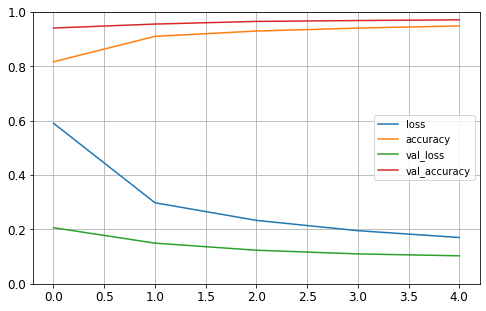

In [163]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()